In [14]:
# after reducing the seven features in to three by the application of principal omponent analysis K-means clustering is applied to observe any pattern 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import matplotlib as mpl

In [3]:
df=pd.read_csv('pca_analysis.csv')
df.drop(columns=['Class'],inplace=True)

In [4]:
positions = ['A', 'C', 'D', 'G','O','J','N']
x = df.loc[:, positions].values
pd.DataFrame(data = x, columns = positions).head()

,A,C,D,G,O,J,N
0,3.636364,12.727273,25.454545,5.454545,27.272727,0.000000,25.454545
1,0.000000,0.000000,53.846154,15.384615,30.769231,0.000000,0.000000
2,0.000000,0.000000,42.857143,42.857143,14.285714,0.000000,0.000000
3,0.000000,6.451613,61.290323,12.903226,12.903226,6.451613,0.000000
4,4.000000,8.000000,66.000000,18.000000,4.000000,0.000000,0.000000


In [5]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)

In [6]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [7]:
features = ['principal component 1','principal component 2','principal component 3']
z = principalDf.values

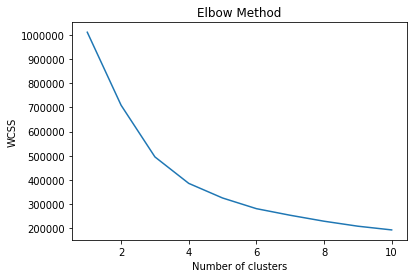

In [8]:
# We applied WCSS(within-cluster sums of squares) method todetermine the minimum number of clusters required to analyze the data
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(z)

In [10]:
ClusterDf= pd.DataFrame(data =z
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


In [11]:
ClusterDf['clas']=pred_y

In [13]:
y=ClusterDf['clas'].values

In [17]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'principal component3')

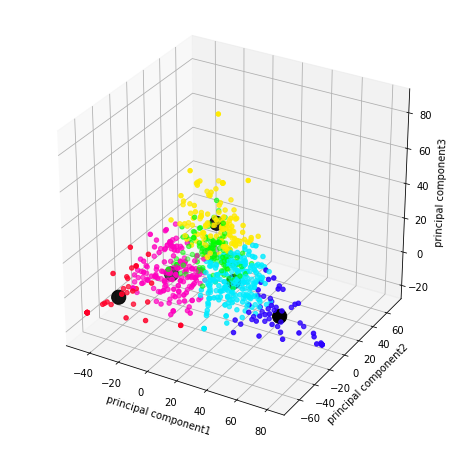

In [19]:
fig1 = plt.figure(figsize = (8,8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(ClusterDf[ 'principal component 1'], ClusterDf[ 'principal component 2'],ClusterDf[ 'principal component 3'],c=y,cmap='gist_rainbow')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2], s=200, c='black')
ax1.set_xlabel('principal component1')
ax1.set_ylabel('principal component2')
ax1.set_zlabel('principal component3')

In [20]:
# analyzing data in each cluster
df['Newclass']=ClusterDf['clas']

In [25]:
positions = ['A', 'C', 'D', 'G','O','J','N','Newclass']
x = df.loc[:,positions].values
FinalData=pd.DataFrame(data = x, columns = positions)

In [28]:
# Analyzing classes one by one
class1=FinalData.loc[FinalData['Newclass'] == 0.0]
class1.drop(columns=['Newclass'],inplace=True)
class2=FinalData.loc[FinalData['Newclass'] == 1.0]
class2.drop(columns=['Newclass'],inplace=True)
class3=FinalData.loc[FinalData['Newclass'] == 2.0]
class3.drop(columns=['Newclass'],inplace=True)
class4=FinalData.loc[FinalData['Newclass'] == 3.0]
class4.drop(columns=['Newclass'],inplace=True)
class5=FinalData.loc[FinalData['Newclass'] == 4.0]
class5.drop(columns=['Newclass'],inplace=True)
class6=FinalData.loc[FinalData['Newclass'] == 5.0]
class6.drop(columns=['Newclass'],inplace=True)

C:\Users\rte26\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


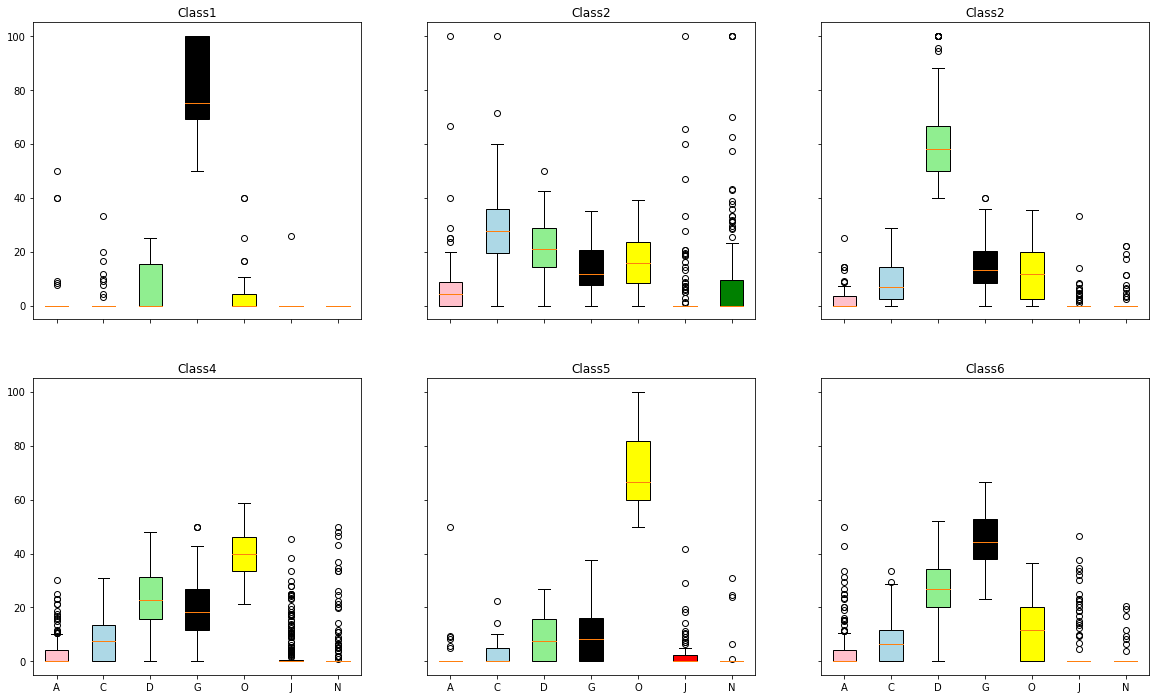

In [29]:
fig, ax = plt.subplots(2,3,sharex=True,sharey=True,figsize=(20,12))
labels = ['A', 'C', 'D', 'G','O','J','N']
bplot1 = ax[0,0].boxplot(class1.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[0,0].set_title('Class1')
bplot2 = ax[0,1].boxplot(class2.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[0,1].set_title('Class2')
bplot3 = ax[0,2].boxplot(class3.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[0,2].set_title('Class2')
bplot4 = ax[1,0].boxplot(class4.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[1,0].set_title('Class4')
bplot5 = ax[1,1].boxplot(class5.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[1,1].set_title('Class5')
bplot6 = ax[1,2].boxplot(class6.values,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax[1,2].set_title('Class6')
colors = ['pink', 'lightblue', 'lightgreen','black','yellow','red','green']
for bplot in (bplot1, bplot2,bplot3,bplot4,bplot5,bplot6):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [30]:
# Above figure shows the six different type of working pattern depending upon position of waorkers in each position
# As different positions refer to different operations it gives an view of working pattern